In [1]:
import string
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from britain_elects_utils import (parties,
                                  read_data,
                                  process_wvi_data,
                                  plot_vote_intention)
from polling_report_history import read_historical_polling_report
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("./britain_elects_all/britain_elects_all.csv", index_col=0)
chars_to_keep = string.ascii_letters + string.digits + "%- "
df["full_text"] = df["full_text"].str.replace("\n", " ")
df["full_text"] = df["full_text"].apply(lambda x: ''.join([char for char in x if char in chars_to_keep]).lower())

In [3]:
wcloud = wordcloud.WordCloud(background_color='white', width=1500, height=800).generate(' '.join(df["full_text"]))

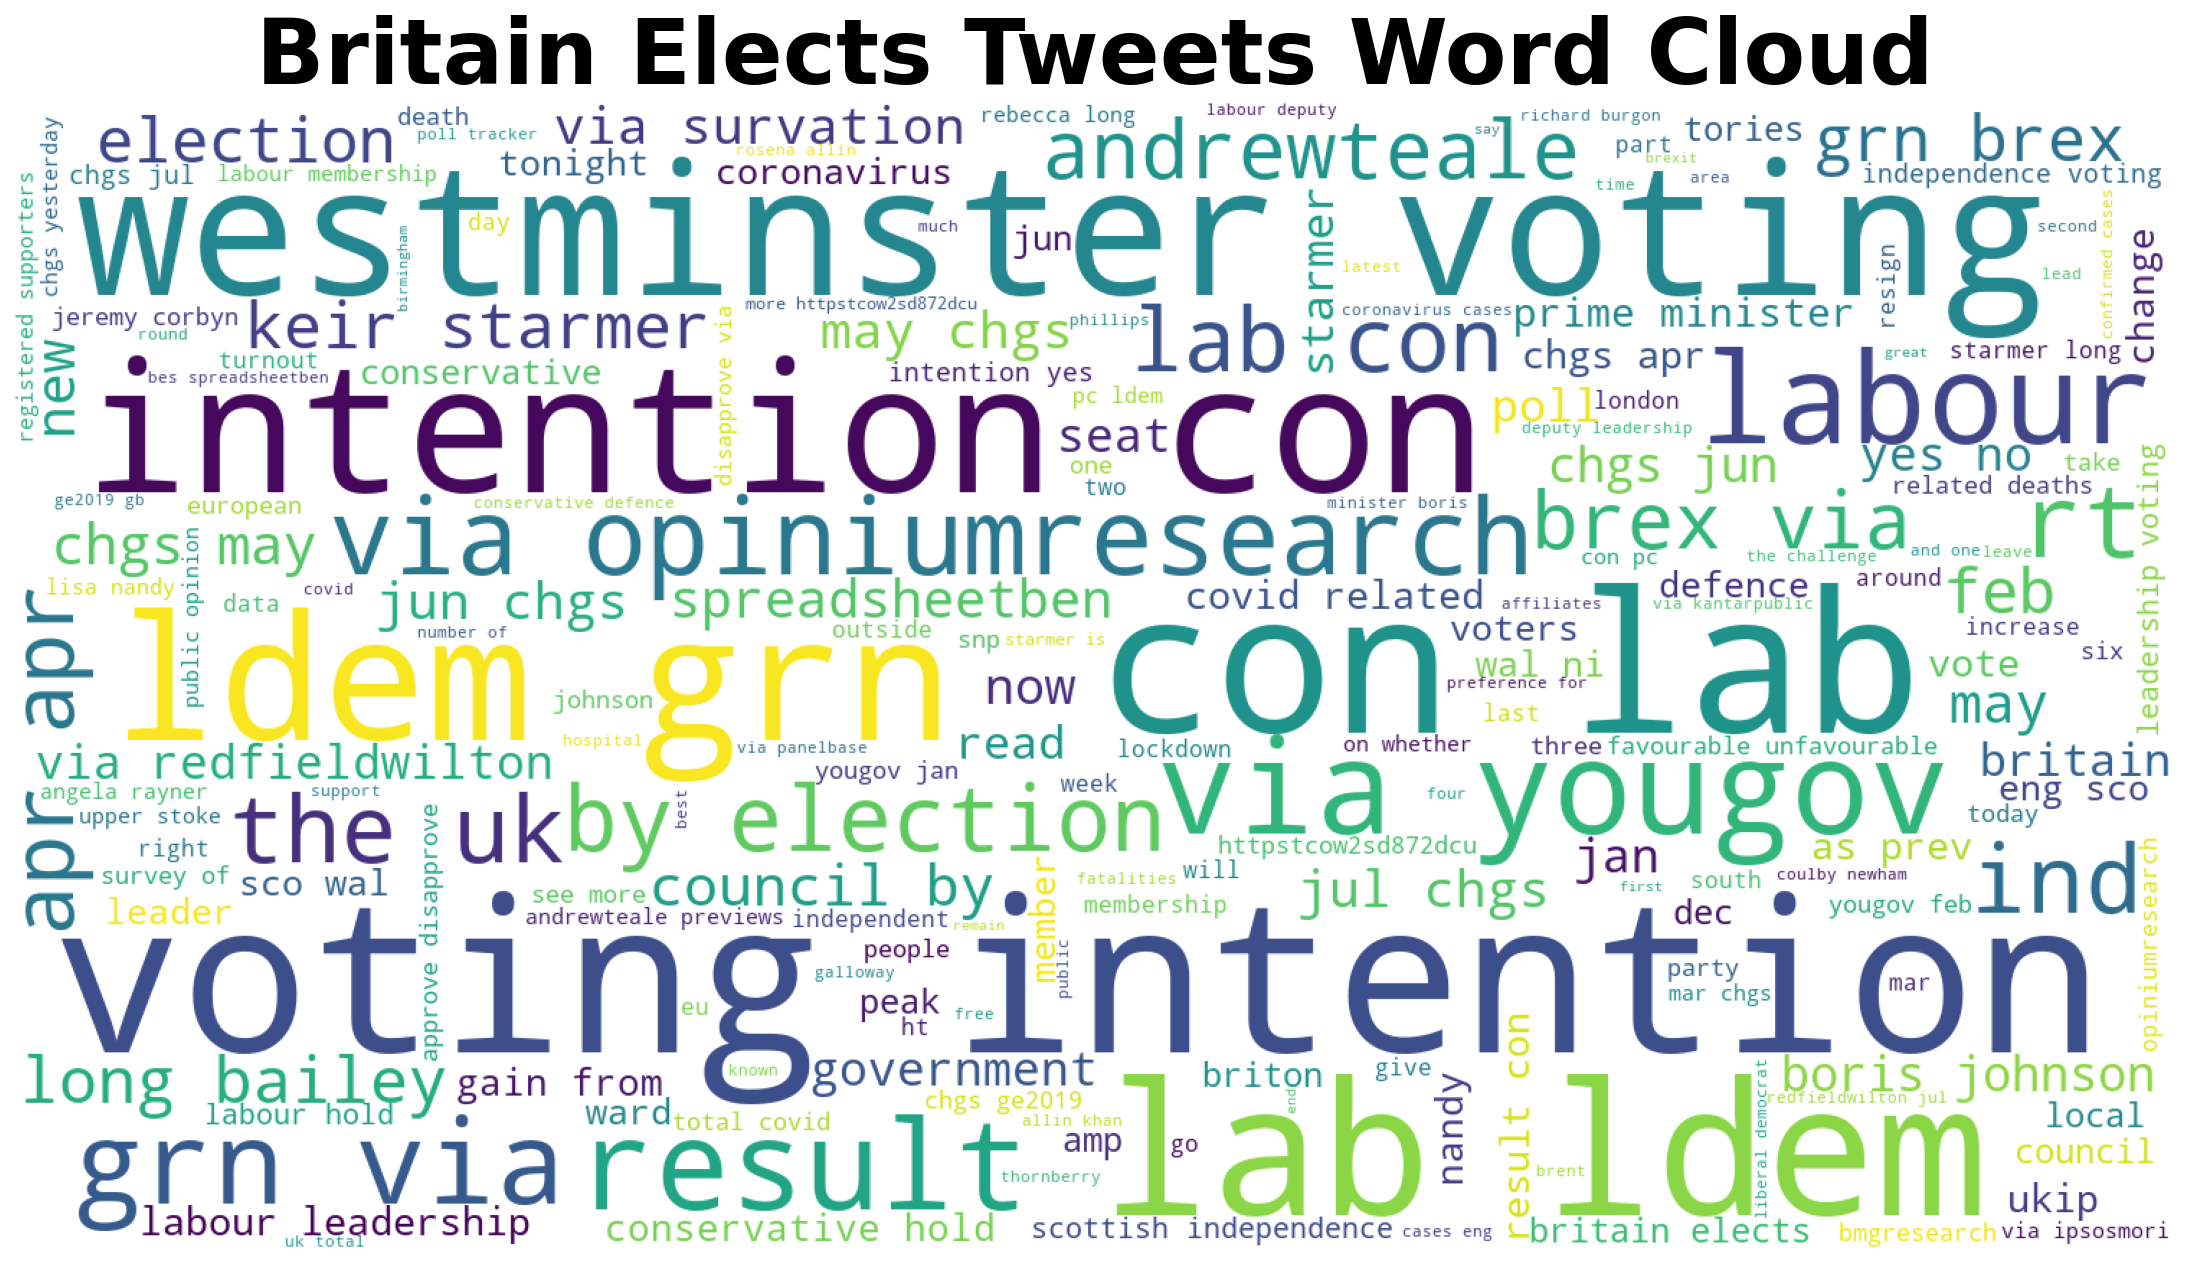

In [4]:
plt.figure(figsize=(15, 8), facecolor=None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.title("Britain Elects Tweets Word Cloud", fontweight="bold", fontsize=45);

In [5]:
df = read_data("britain_elects_wvi_data")
df = process_wvi_data(df)

In [6]:
df.head()

,created_at,source,start,end,change_info,GRN,GRN_change,LAB,LAB_change,LDEM,LDEM_change,SNP,SNP_change,CON,CON_change,BREX,BREX_change,UKIP,UKIP_change,collection_source
date,,,,,,,,,,,,,,,,,,,,
2020-01-10 00:00:00,2020-01-13 22:39:06,BMGResearch,2020-01-08,2020-01-10,"GE2019, GB result",NaN,NaN,29,-4,11.0,-1.0,NaN,NaN,44.0,-1.0,NaN,NaN,NaN,NaN,britainelects
2020-01-17 00:00:00,2020-01-18 21:40:06,OpiniumResearch,2020-01-15,2020-01-17,"GE2019, GB-wide result",4.0,1.0,30,-3,9.0,-3.0,NaN,NaN,47.0,2.0,3.0,1.0,NaN,NaN,britainelects
2020-01-26 00:00:00,2020-01-28 10:50:20,YouGov,2020-01-24,2020-01-26,"GE2019, GB result",4.0,1.0,29,-4,10.0,-2.0,NaN,NaN,49.0,4.0,NaN,NaN,NaN,NaN,britainelects
2020-01-31 18:07:24,2020-01-31 18:07:24,Survation,NaT,NaT,NaN,3.0,0.0,33,1,10.0,-2.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,britainelects
2020-02-02 00:00:00,2020-02-05 15:10:44,YouGov,2020-01-31,2020-02-02,26 Jan,5.0,1.0,30,1,8.0,-2.0,NaN,NaN,49.0,0.0,2.0,0.0,NaN,NaN,britainelects


In [7]:
histo = read_historical_polling_report()
histo.head()

,source,end,CON,LAB,LDEM,UKIP,GRN,collection_source
date,,,,,,,,
2019-12-11,DeltapollUK,2019-12-11,45,35,10,NaN,3.0,uk_prh
2019-12-11,KantarPublic,2019-12-11,44,32,13,NaN,3.0,uk_prh
2019-12-11,BMGResearch,2019-12-11,41,32,14,NaN,3.0,uk_prh
2019-12-11,OpiniumResearch,2019-12-11,45,33,12,NaN,2.0,uk_prh
2019-12-11,Panelbase,2019-12-11,43,34,11,NaN,3.0,uk_prh


In [8]:
df = pd.concat([histo, df]).sort_index()

In [9]:
plt.style.use("fivethirtyeight")

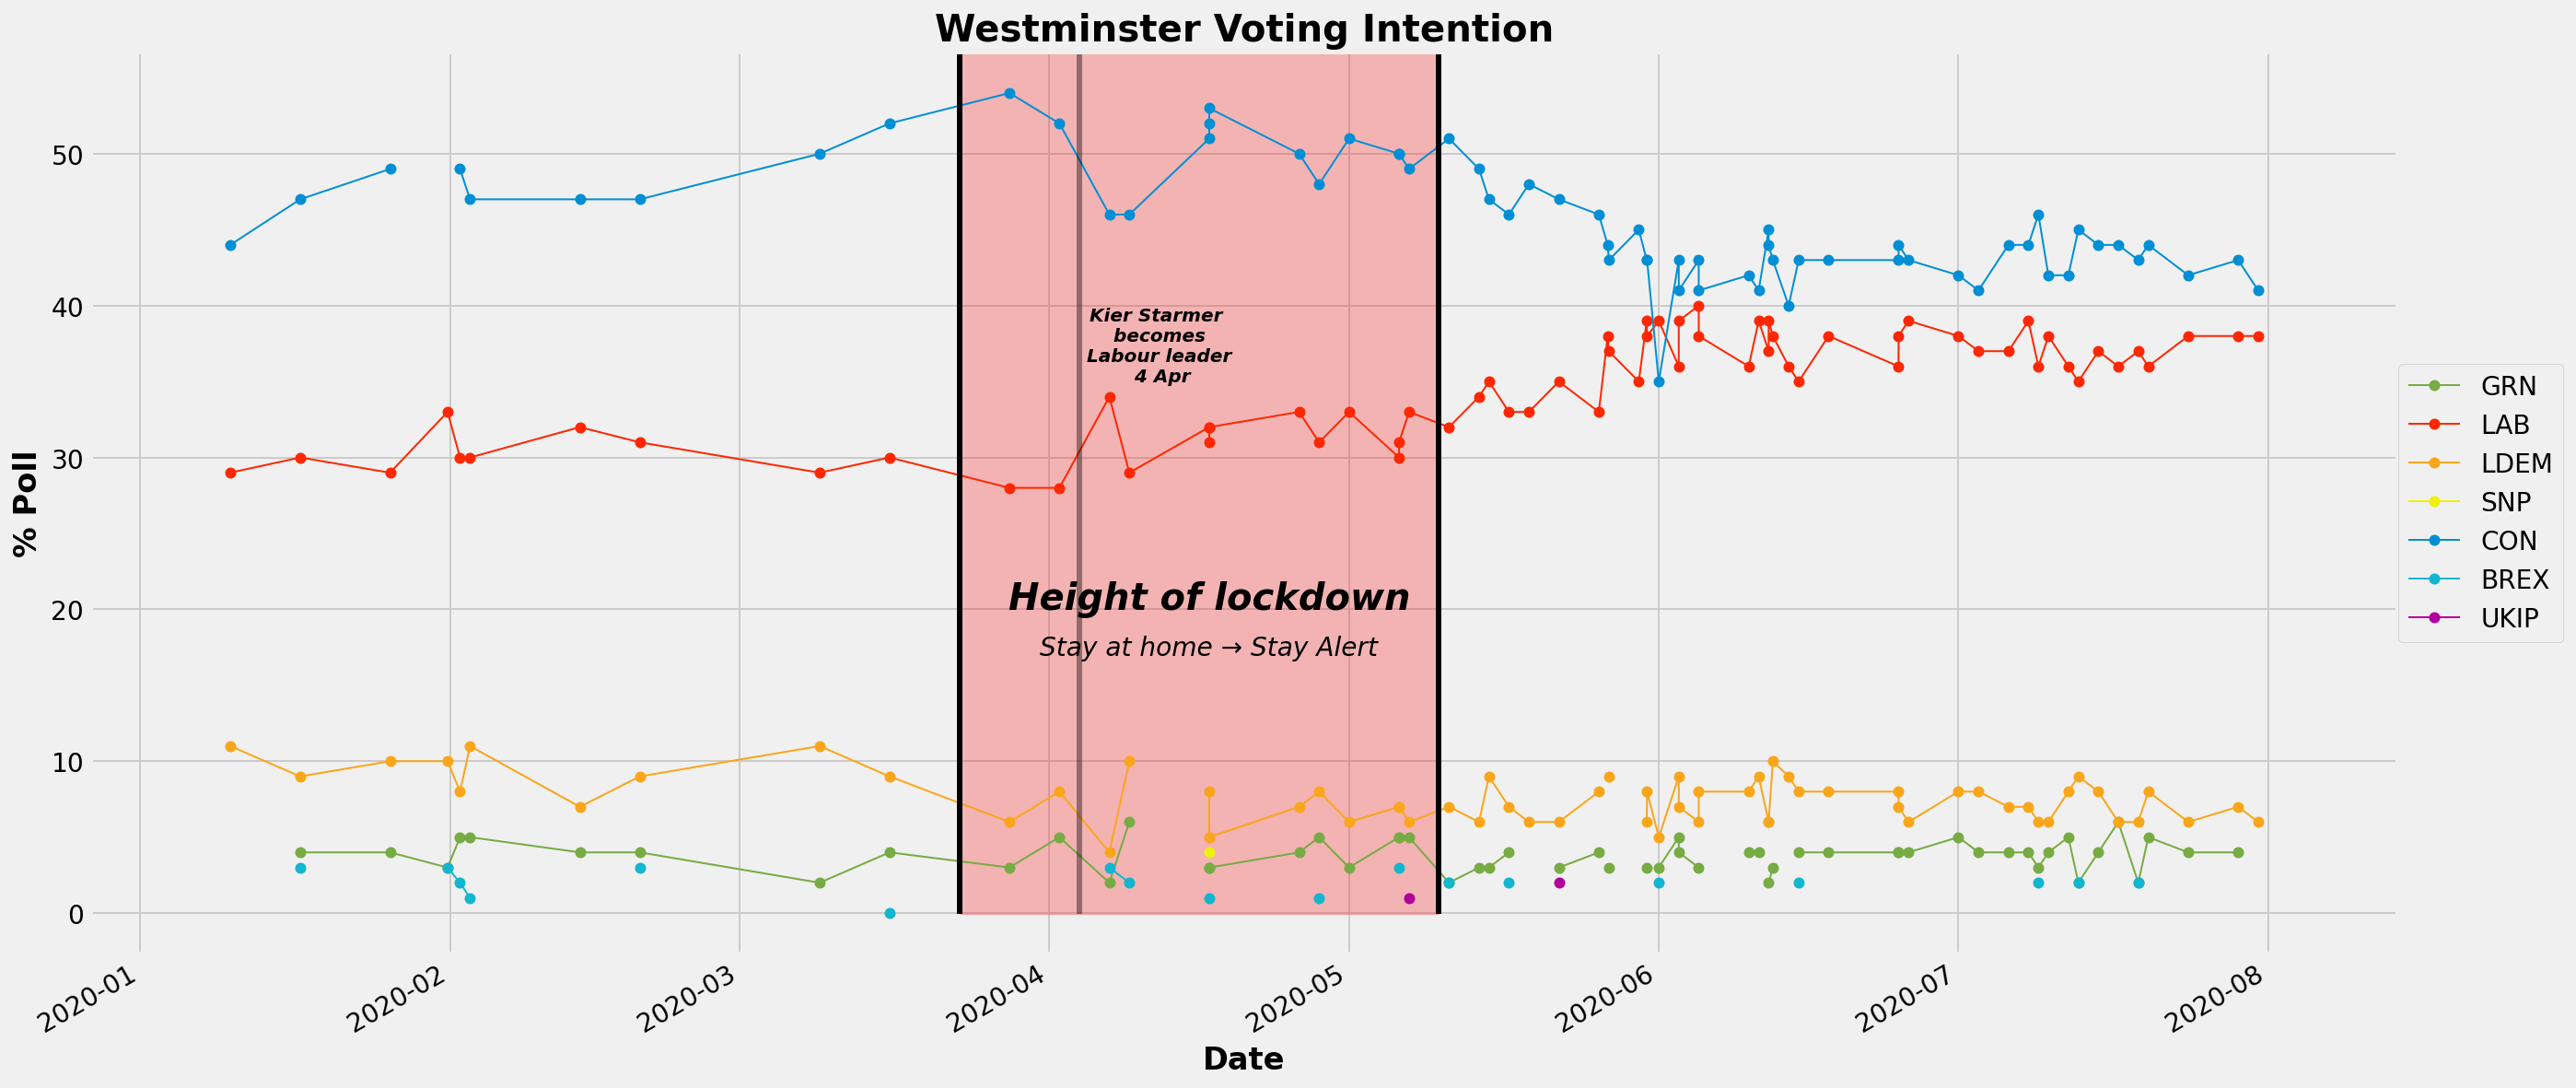

In [10]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], add_context_annot=True)

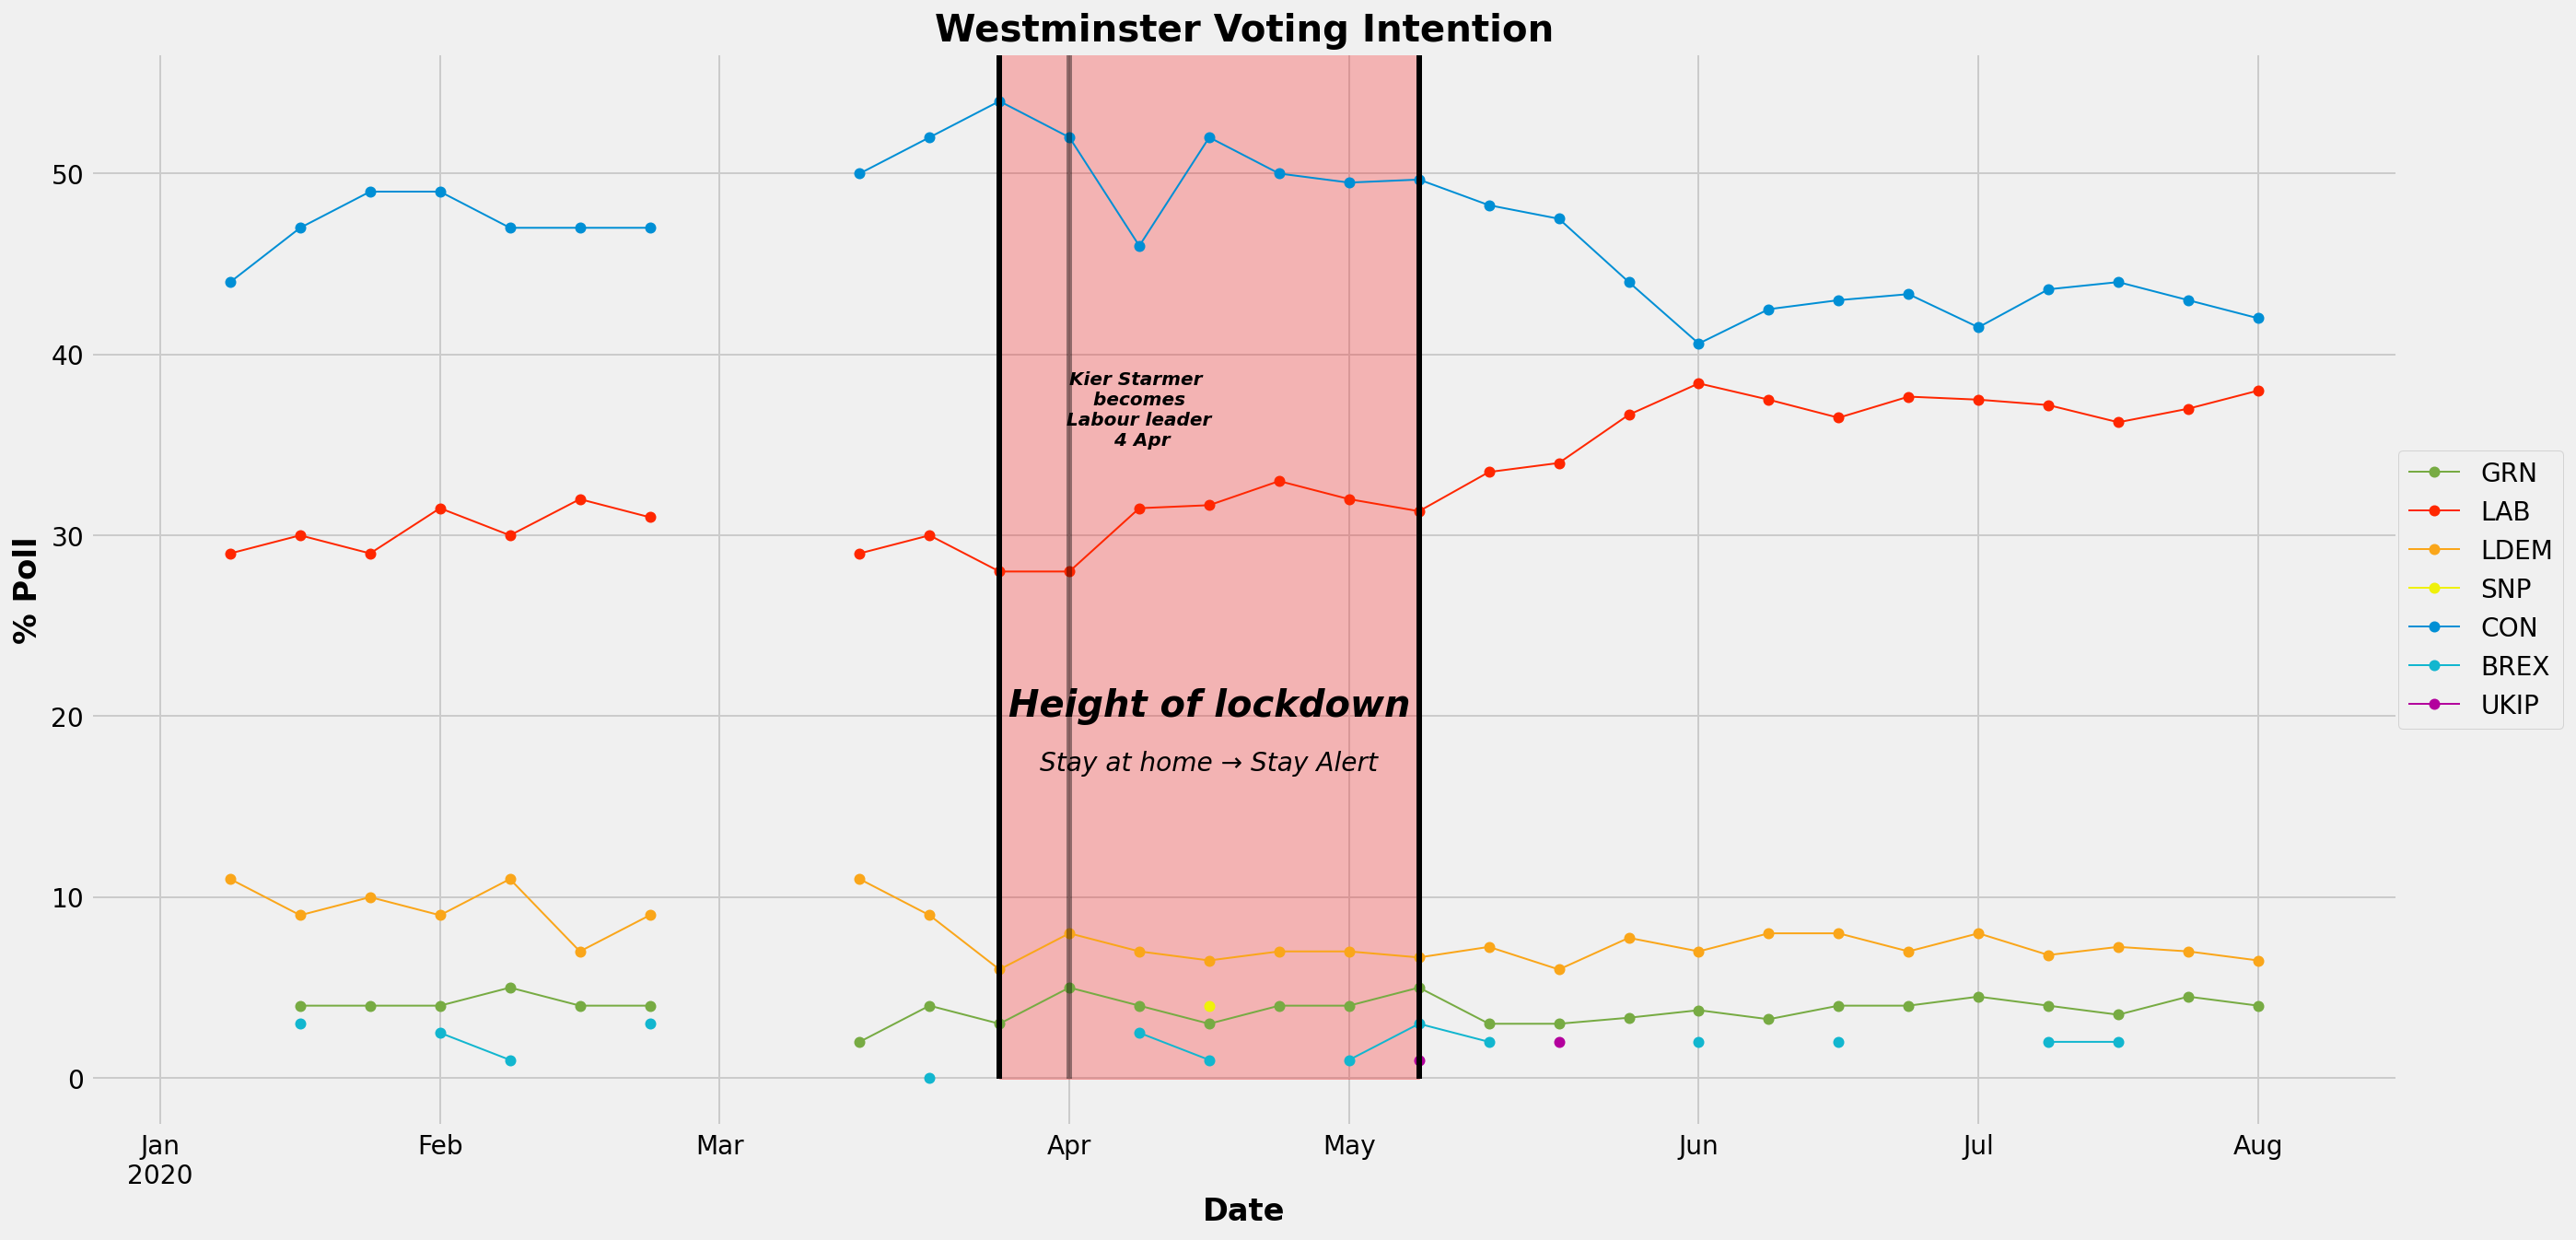

In [11]:
plot_vote_intention((df[df["collection_source"] == "britainelects"]
                     .resample('W', label='right')
                     .mean()),
                    add_context_annot=True)

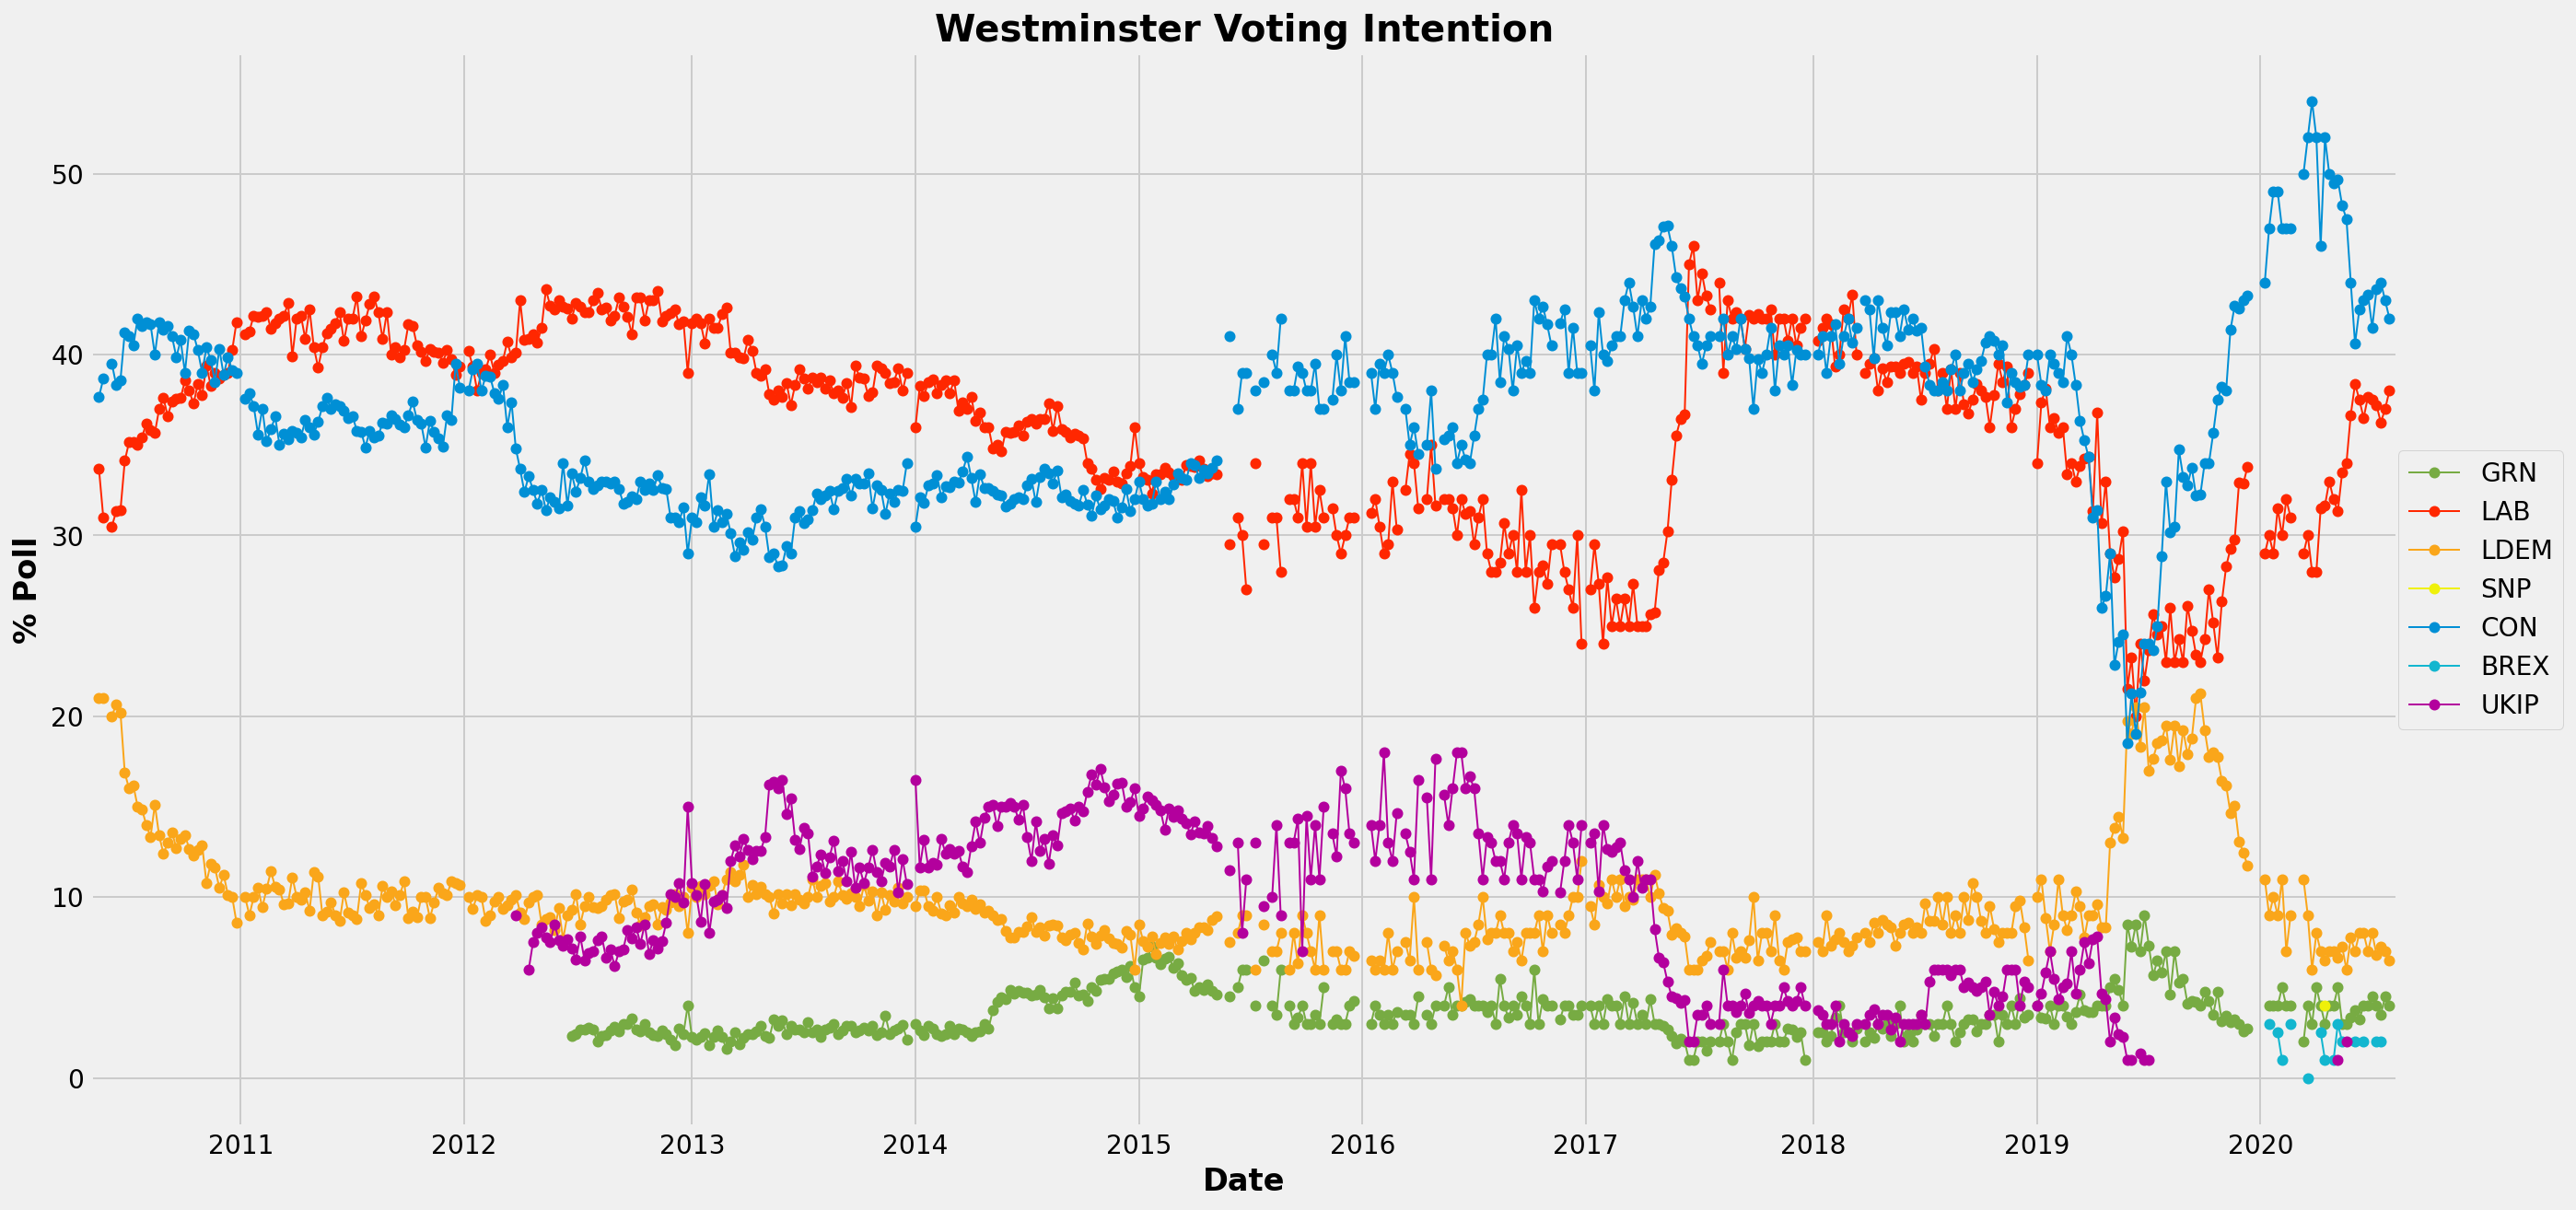

In [12]:
plot_vote_intention(df.resample('W', label='right').mean())

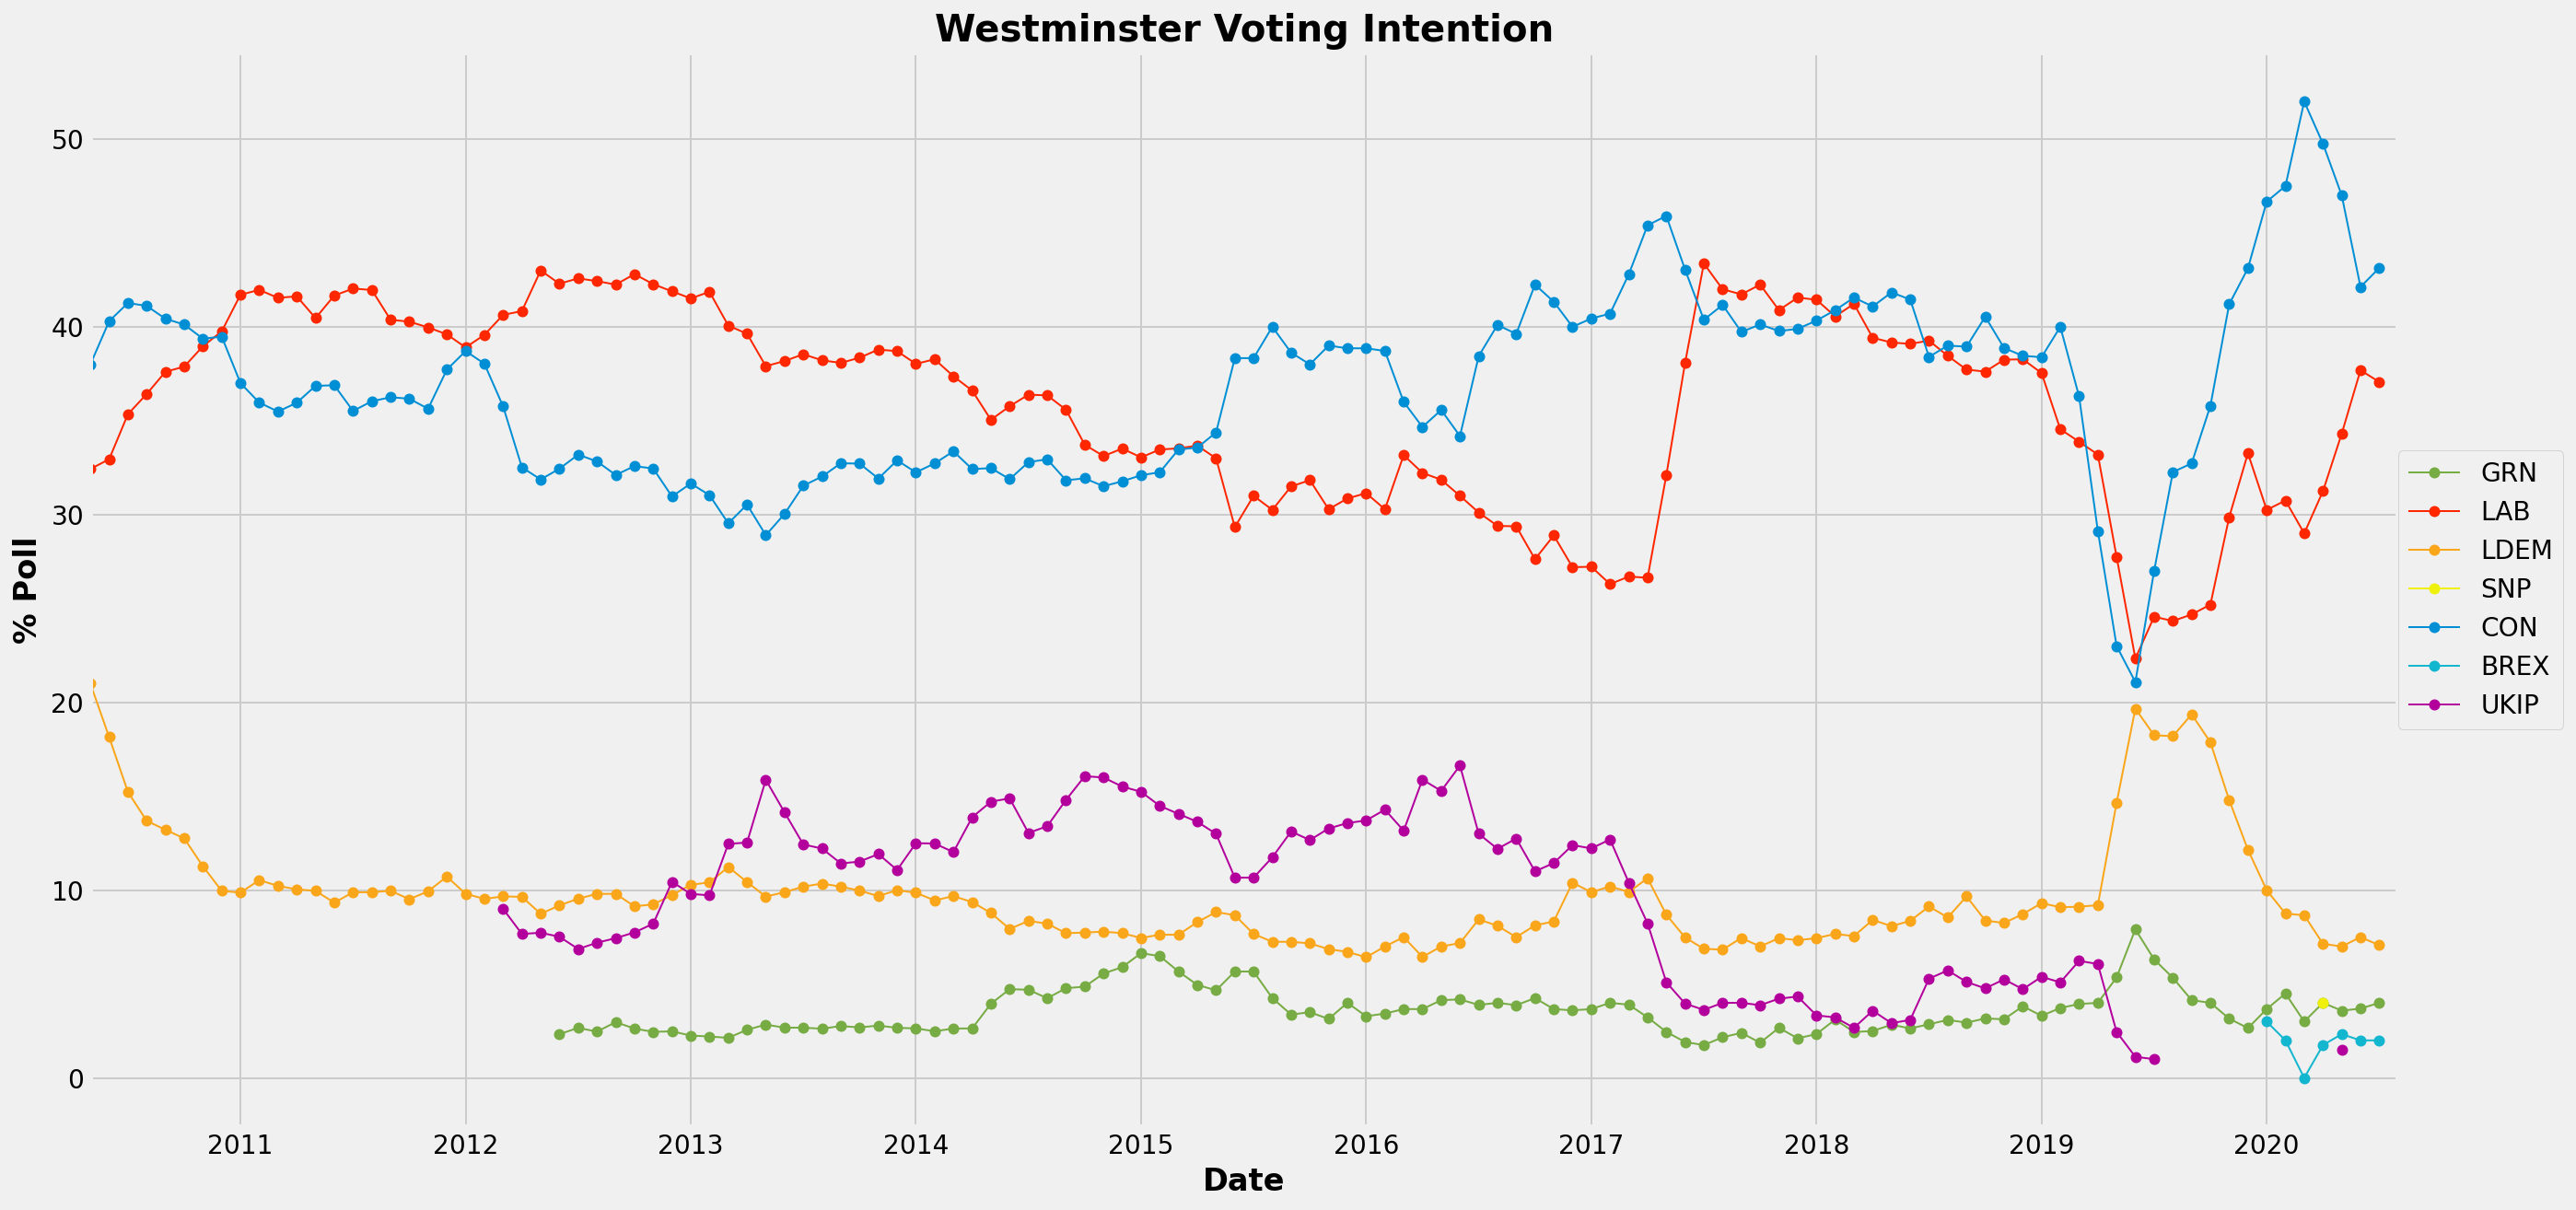

In [13]:
plot_vote_intention(df.resample('M', label='right').mean())

In [14]:
df[list(parties)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2758 entries, 2010-05-13 00:00:00 to 2020-07-31 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRN     2026 non-null   float64
 1   LAB     2758 non-null   int64  
 2   LDEM    2755 non-null   float64
 3   SNP     1 non-null      float64
 4   CON     2757 non-null   float64
 5   BREX    18 non-null     float64
 6   UKIP    1891 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 172.4 KB


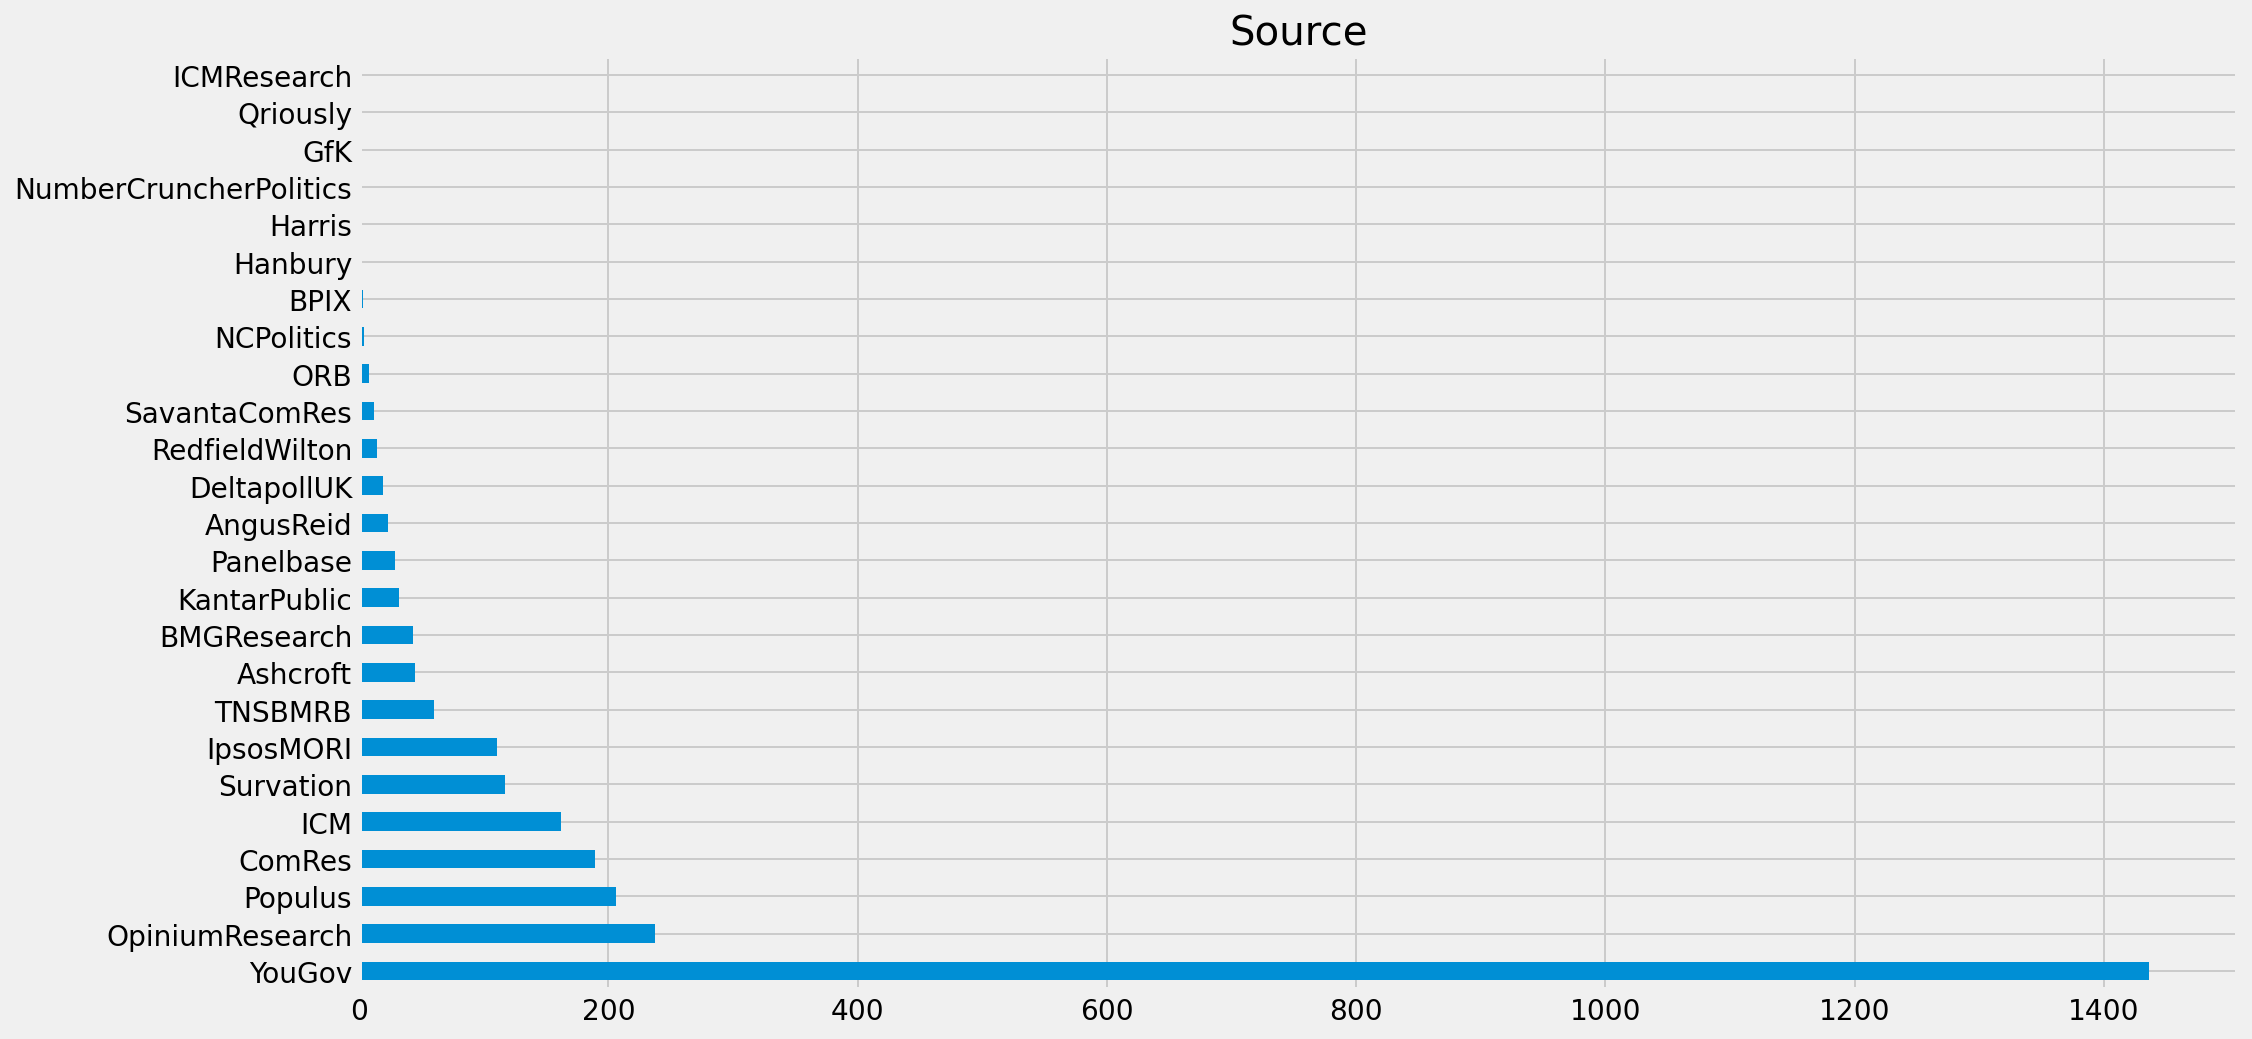

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df["source"].value_counts().plot(kind='barh', ax=ax)
ax.set_title("Source");